In [1]:
# import all the required libraries and put matplotlib in inline mode to plot on the notebook
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# linear regression
from sklearn import linear_model

# nearest neighbor
from sklearn import neighbors

# regression trees (simple and ensemble)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
# define the random seed if needed
random_seed = 1234

# define the figure size and the font size
fig_width = 12
fig_height = 9
fig_font_size = 16

In [3]:
df = pd.read_csv('housing.csv')
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
def plot_prediction(x, y, xp=None, yp=None, title=""):
    """Plots the original data (x,y) and a set of point (xp, yp) showing the model approximation"""
    
    plt.figure(figsize=(fig_width,fig_height))

    font = {'family': 'sans', 'size': fig_font_size}
    plt.rc('font', **font)

    plt.scatter(x, y, color='blue')
    
    if (not xp is None) and (not yp is None):
        plt.plot(xp, yp, color='red', linewidth=3)
        
    plt.xlabel("LSTAT")
    plt.ylabel("MEDV")
    
    plt.title(title)

    plt.xlim([0, 40])
    plt.ylim(0, 55)
        
    plt.show()

In [5]:
# compute the data inputs
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values.ravel()

# input values used to plot the predicted model
X_test = np.linspace(np.min(X), np.max(X), 500)[:, np.newaxis]

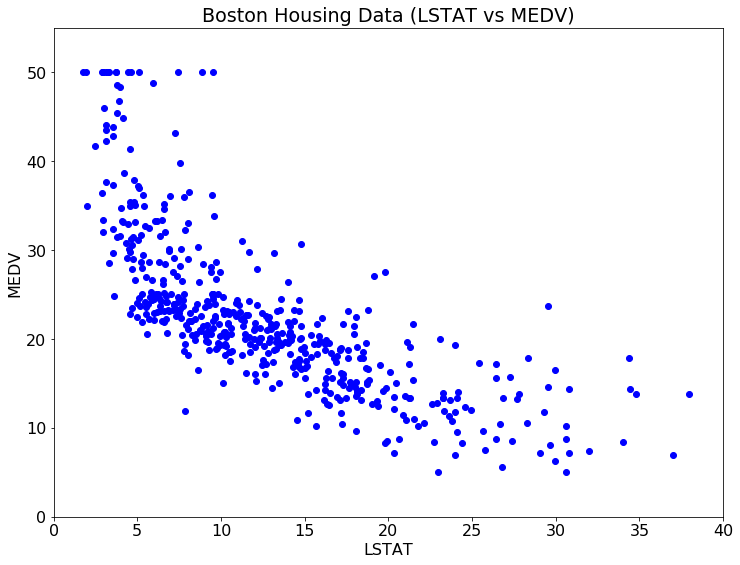

In [6]:
plt.figure(figsize=(fig_width,fig_height))

font = {'family' : 'sans', 'size'   : fig_font_size}
plt.rc('font', **font)

plt.scatter(X, y,  color='blue')

plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.title("Boston Housing Data (LSTAT vs MEDV)")

plt.xlim([0,40])
plt.ylim(0,55)

plt.show()

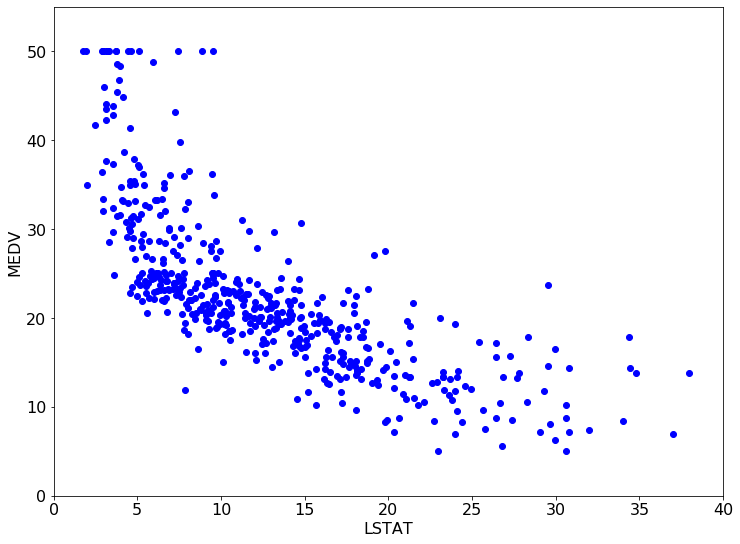

In [7]:
plot_prediction(X, y);

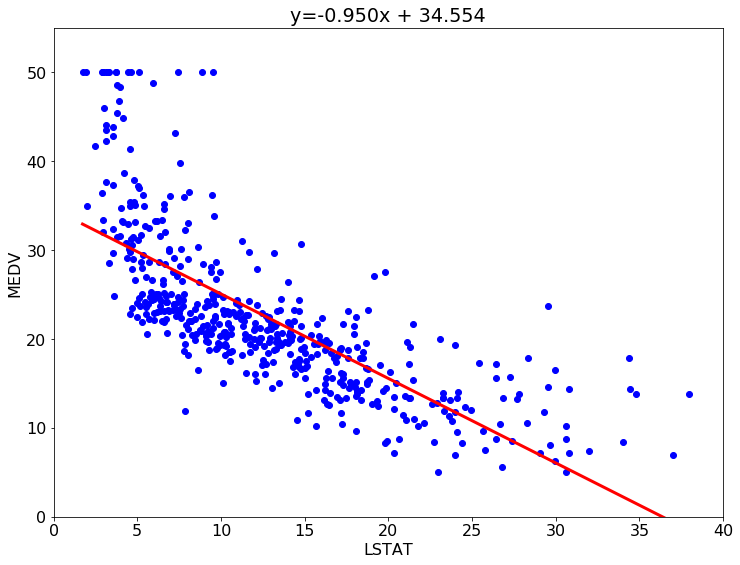

In [8]:
# simple linear regression
regr = linear_model.LinearRegression()
regr.fit(X, y)

# model output for the input data
y_test = regr.predict(X_test)

# plot the result
plot_prediction(X, y, X_test, y_test, "y=%.3fx + %.3f" % (regr.coef_[0], regr.intercept_));

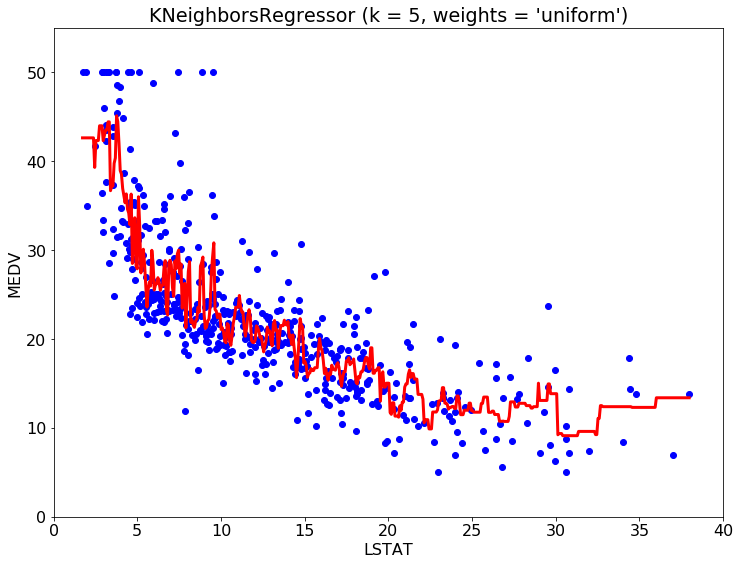

In [9]:
knn = neighbors.KNeighborsRegressor(5, weights='uniform')

knn.fit(X, y)

y_test = knn.predict(X_test)

plot_prediction(X, y, X_test, y_test, "KNeighborsRegressor (k = 5, weights = 'uniform')");

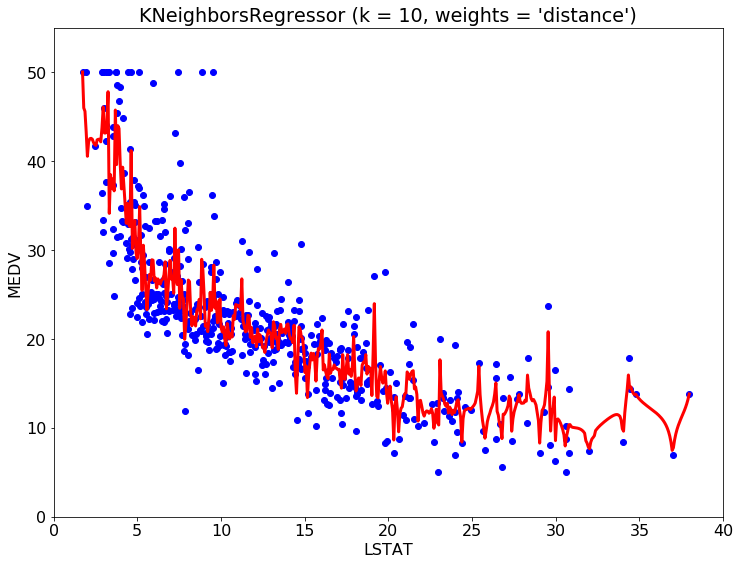

In [16]:
knn = neighbors.KNeighborsRegressor(10, weights='distance')

knn.fit(X, y)

y_test = knn.predict(X_test)

plot_prediction(X, y, X_test, y_test, "KNeighborsRegressor (k = 10, weights = 'distance')");

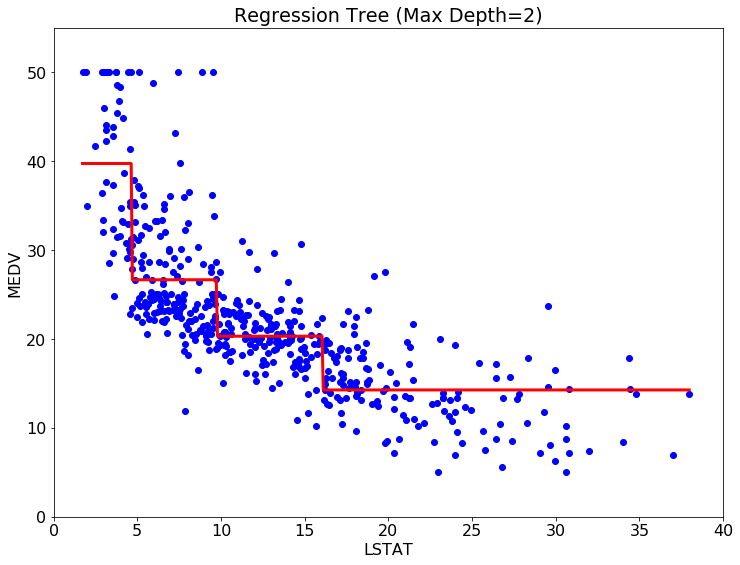

In [18]:
regression_tree = DecisionTreeRegressor(max_depth=2)
regression_tree.fit(X, y.ravel())
y_test = regression_tree.predict(X_test)

plot_prediction(X, y, X_test, y_test, "Regression Tree (Max Depth=2)");

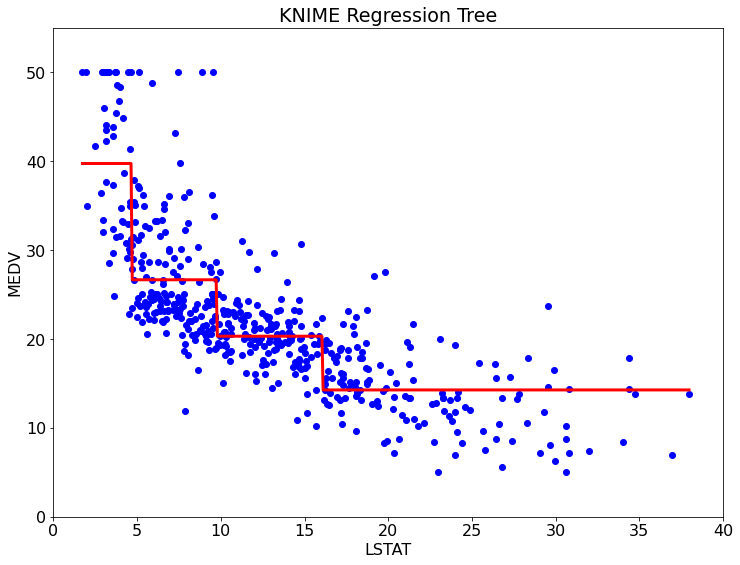

In [16]:
# implementation of the model developed using KNIME

def TreeModel(x):
    if (x<=9.725):
        if (x<=4.65):
            return 39.718
        else:
            return 26.6463
    else:
        if (x<=16.08):
            return 20.302
        else:
            return 14.2618


y_test = np.vectorize(TreeModel)(X_test)

plot_prediction(X, y, X_test, y_test, "KNIME Regression Tree");

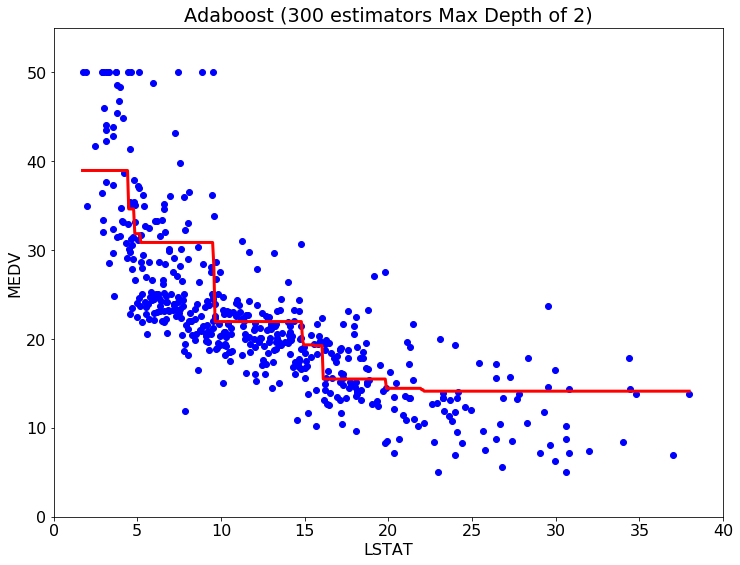

In [19]:
adaboost_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators=300, random_state=random_seed)
adaboost_model.fit(X, y.ravel())

y_test = adaboost_model.predict(X_test)

plot_prediction(X, y, X_test, y_test, "Adaboost (300 estimators Max Depth of 2)");